In [35]:
if 'libraries_imported' not in globals():
    libraries_imported = False

if libraries_imported == False:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    from datetime import datetime, timedelta
    from datetime import datetime
    from scipy.interpolate import make_interp_spline
    import plotly.graph_objects as go
    from scipy.signal import butter, filtfilt
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    from tensorflow.keras.layers import Input
    import sys
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    import numpy as np
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import RobustScaler
    import tensorflow as tf
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from sklearn.preprocessing import RobustScaler
    import joblib
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    from sklearn.utils.class_weight import compute_class_weight
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import joblib
    import tensorflow as tf
    from sklearn.preprocessing import RobustScaler
    from sklearn.model_selection import train_test_split
    from sklearn.utils.class_weight import compute_class_weight
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    import numpy as np
    import pandas as pd
    import joblib
    import tensorflow as tf
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE




    # # Display the first few rows
    # import ace_tools as tools  # Importing display tool

In [36]:

# Load and clean SaniWASE dataset
saniWASE_df = pd.read_csv("datasets/SaniWASE_Data_Cleaned_t1.csv")
saniWASE_df["date"] = pd.to_datetime(saniWASE_df["datetime"])
saniWASE_df.drop(columns=["index", "datetime", "f/m_ratio", "fos", "tac"], inplace=True)
saniWASE_df = saniWASE_df.drop_duplicates()
# Load and clean Cook dataset
cook_df = pd.read_csv("datasets/Cook_Data_Cleaned_t1.csv")
cook_df['date'] = pd.to_datetime(cook_df['date'])
cook_df = cook_df.groupby('date').mean()
cook_df = cook_df.drop_duplicates()
cook_df.reset_index(inplace=True)


cook_df["methane_percentage"] *= 100

# Ensure consistent column order, keeping "date" first
column_order = ["date"] + [col for col in saniWASE_df.columns if col != "date"]
saniWASE_df = saniWASE_df[column_order]
cook_df = cook_df[column_order]




#Only keep live data inputs 

saniWASE_df.drop(columns=["h2s_ppm", "t1_cod", "t1_olr", "fostac"], inplace=True)
cook_df.drop(columns=["h2s_ppm", "t1_cod", "t1_olr", "fostac"], inplace=True)


display(saniWASE_df.head())
display(cook_df.head())


saniWASE_df_interpolated = saniWASE_df.interpolate(method = 'ffill')
cook_df_interpolated = cook_df.interpolate(method = 'ffill')

cook_df_interpolated = cook_df_interpolated.dropna()


,date,eq_ph,eq_cod,feed_vol,t1_ph,current,temp,methane_percentage,hrt,biogas_vol
0,2022-07-06,5.5,14694,144,7.1,1652,36.8,65.1,25.0,1232.0
1,2022-08-06,5.3,15633,144,7.2,1652,36.8,68.0,25.0,1019.0
2,2022-09-06,5.2,11950,144,7.3,1652,36.8,70.9,25.0,1005.0
3,2022-10-06,5.2,14399,192,7.3,1652,34.8,65.7,19.0,892.0
4,2022-11-06,NaN,14399,192,NaN,1652,NaN,65.7,19.0,1100.0


,date,eq_ph,eq_cod,feed_vol,t1_ph,current,temp,methane_percentage,hrt,biogas_vol
0,2024-11-04,3.7,39900.0,60.0,7.0,497.422,35.770769,6666.0,15.0,300.0
1,2024-11-05,3.7,31400.0,60.0,7.0,545.210,36.464368,6271.0,15.0,690.0
2,2024-11-06,3.7,26700.0,60.0,7.0,519.733,36.996667,6416.0,15.0,660.0
3,2024-11-07,3.6,27500.0,60.0,7.0,506.521,35.317529,6132.0,15.0,770.0
4,2024-11-08,3.7,32900.0,60.0,7.0,484.783,35.906047,6061.0,15.0,740.0


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


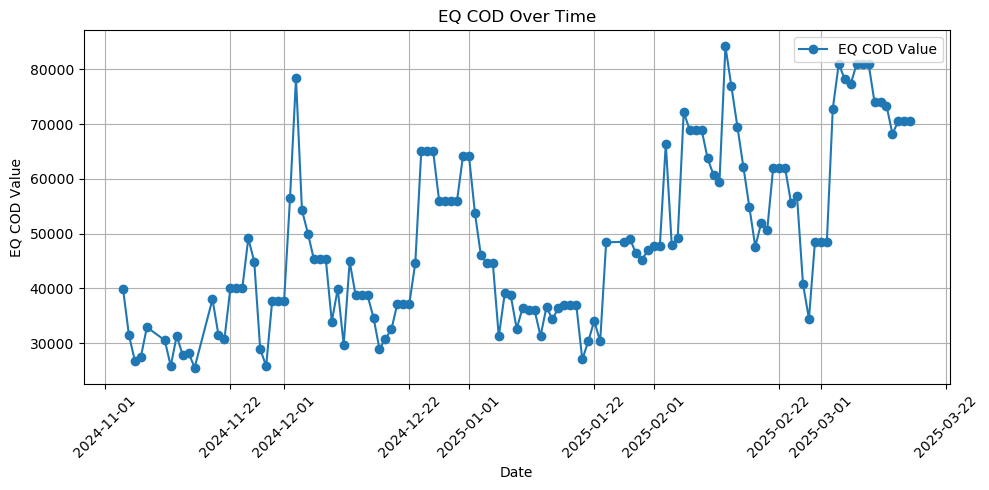

In [37]:
import plotly.express as px

# Assuming 'df' is your dataframe and it has 'date' as the index.
# If 'date' is not the index, ensure it is converted to a datetime column in the dataframe.

# Convert index to a column if needed
cook_df.reset_index(inplace=True)

# fig = px.line(cook_df, x='date', y='eq_cod', title='EQ COD Over Time', labels={'eq_cod': 'EQ COD Value'})
# fig.update_xaxes(title_text='Date')
# fig.update_yaxes(title_text='EQ COD Value')
# fig.update_layout(showlegend=True)

# fig.show()
# Create a line plot of EQ COD over time
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed
plt.plot(cook_df['date'], cook_df['eq_cod'], label='EQ COD Value', marker='o')  # 'o' adds markers to each data point
plt.title('EQ COD Over Time')  # Set the title of the graph
plt.xlabel('Date')  # Set the label for the x-axis
plt.ylabel('EQ COD Value')  # Set the label for the y-axis
plt.legend()  # Display the legend
plt.grid(True)  # Enable grid for better readability
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Automatically adjust subplot parameters to give the plot a proper layout
plt.show()  # Display the plot


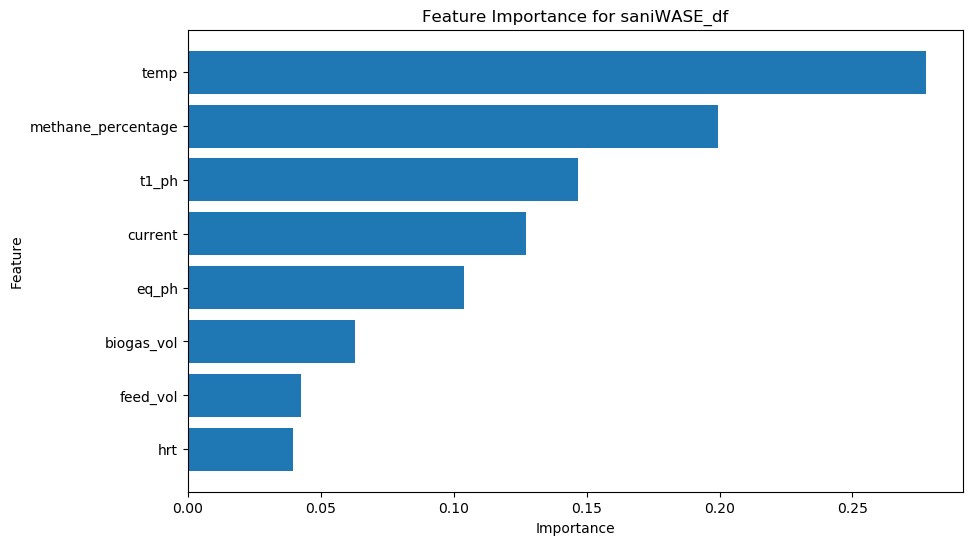

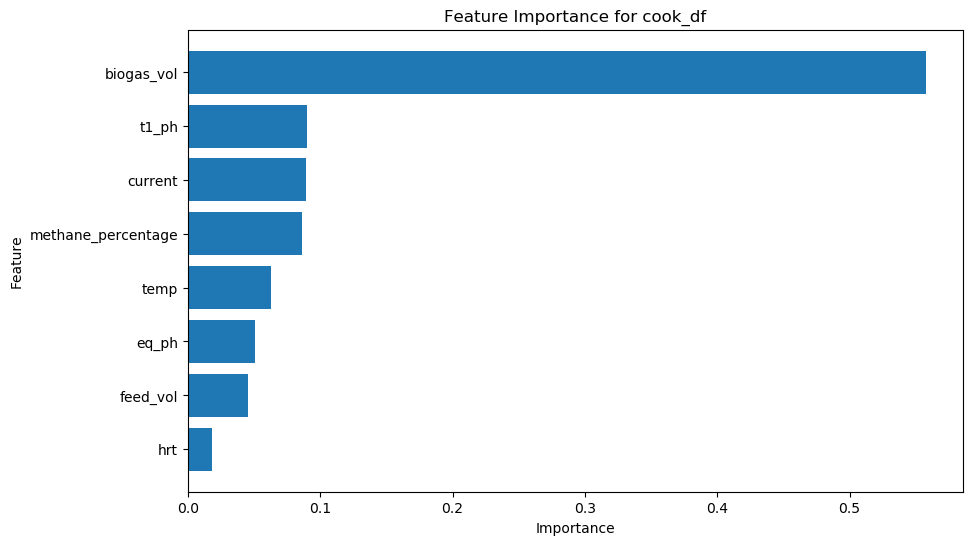

In [38]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Function to perform feature importance analysis
def feature_importance_analysis(df, target_column, drop_columns, title):
    # Prepare the data
    X = df.drop(drop_columns, axis=1)
    y = df[target_column]

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modeling
    model = RandomForestRegressor(n_estimators=300, random_state=42)
    model.fit(X_train, y_train)

    # Feature importance extraction
    importances = model.feature_importances_
    features = X_train.columns

    # Sorting the features by importance
    indices = np.argsort(importances)
    sorted_features = [features[i] for i in indices]
    sorted_importances = importances[indices]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importances)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.show()

# Feature importance for saniWASE_df
feature_importance_analysis(
    df= saniWASE_df_interpolated,
    target_column='eq_cod',
    drop_columns=['eq_cod', 'date'],
    title='Feature Importance for saniWASE_df'
)

# Feature importance for cook_df
feature_importance_analysis(
    df= cook_df_interpolated,
    target_column='eq_cod',
    drop_columns=['eq_cod', 'date'],
    title='Feature Importance for cook_df'
)



# Feature Importance Comparison

## Common Observations
- **`t1_ph`** is the most significant feature in both datasets (importance > 0.4).
- **`biogas_vol`** consistently ranks among the top three features.

## Notable Differences

| Feature               | saniWASE_df Importance | cook_df Importance |
|-----------------------|------------------------|--------------------|
| **`methane_percentage`** | High (2nd)             | Low (6th)          |
| **`eq_ph`**              | Moderate (5th)         | High (2nd)         |
| **`feed_vol`**           | Low (8th)              | Moderate (4th)     |
| **`current`**            | Moderate (4th)         | Low (5th)          |
| **`temp`**               | Low (slightly higher)  | Very Low           |
| **`hrt`**                | Consistently low       | Lowest             |

## Overall Insights
- **`t1_ph`** consistently emerges as the most influential predictor, indicating pH's critical role across both scenarios.
- Secondary feature importance highlights dataset-specific dynamics:
  - **saniWASE_df** outcomes depend significantly on methane percentage and biogas volume.
  - **cook_df** outcomes rely heavily on equilibrium pH (`eq_ph`) and biogas volume.


In [39]:

df_interpolated  = cook_df_interpolated[['eq_cod', 'date', 't1_ph', 'biogas_vol', 'methane_percentage', 'current', 'temp']]


window_size = 3
df_interpolated['t1_ph_ma'] = df_interpolated['t1_ph'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['biogas_vol_ma'] = df_interpolated['biogas_vol'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['methane_percentage_ma'] = df_interpolated['methane_percentage'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['current_ma'] = df_interpolated['current'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['temp_ma'] = df_interpolated['temp'].rolling(window=window_size, min_periods=1).mean()

# Display the DataFrame to verify the moving averages
print(df_interpolated.head())
df_interpolated = df_interpolated.interpolate(method = 'ffill')
df_interpolated = df_interpolated.interpolate(method = 'bfill')

    eq_cod       date  t1_ph  biogas_vol  methane_percentage  current  \
0  39900.0 2024-11-04    7.0       300.0              6666.0  497.422   
1  31400.0 2024-11-05    7.0       690.0              6271.0  545.210   
2  26700.0 2024-11-06    7.0       660.0              6416.0  519.733   
3  27500.0 2024-11-07    7.0       770.0              6132.0  506.521   
4  32900.0 2024-11-08    7.0       740.0              6061.0  484.783   

        temp  t1_ph_ma  biogas_vol_ma  methane_percentage_ma  current_ma  \
0  35.770769       7.0     300.000000                 6666.0  497.422000   
1  36.464368       7.0     495.000000                 6468.5  521.316000   
2  36.996667       7.0     550.000000                 6451.0  520.788333   
3  35.317529       7.0     706.666667                 6273.0  523.821333   
4  35.906047       7.0     723.333333                 6203.0  503.679000   

     temp_ma  
0  35.770769  
1  36.117569  
2  36.410601  
3  36.259521  
4  36.073414  


/tmp/ipykernel_69837/1729689823.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interpolated['t1_ph_ma'] = df_interpolated['t1_ph'].rolling(window=window_size, min_periods=1).mean()
/tmp/ipykernel_69837/1729689823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interpolated['biogas_vol_ma'] = df_interpolated['biogas_vol'].rolling(window=window_size, min_periods=1).mean()


In [40]:
# print(df_interpolated.info)


print(df_interpolated.describe())

             eq_cod       t1_ph   biogas_vol  methane_percentage     current  \
count    127.000000  127.000000   127.000000          127.000000  127.000000   
mean   48554.527559    6.874862  1418.661417         6107.157313  471.359221   
std    15866.705681    0.138729   747.528586          311.666333   86.316490   
min    25500.000000    6.475000   220.000000         5004.000000  288.361000   
25%    36462.500000    6.800000   815.000000         5905.829157  408.726500   
50%    45300.000000    6.900000  1250.000000         6102.863372  459.455000   
75%    62000.000000    6.986071  1845.000000         6338.910724  523.226500   
max    84200.000000    7.180000  3810.000000         6821.000000  790.962000   

             temp    t1_ph_ma  biogas_vol_ma  methane_percentage_ma  \
count  127.000000  127.000000     127.000000             127.000000   
mean    33.963002    6.875650    1400.748031            6115.245239   
std      1.950136    0.124929     688.835626             258.40018

/home/farscopestudent/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Running iteration 1 based on temporal split
Training on 50 samples, testing on 77 samples.
Number of samples after SMOTE: 108


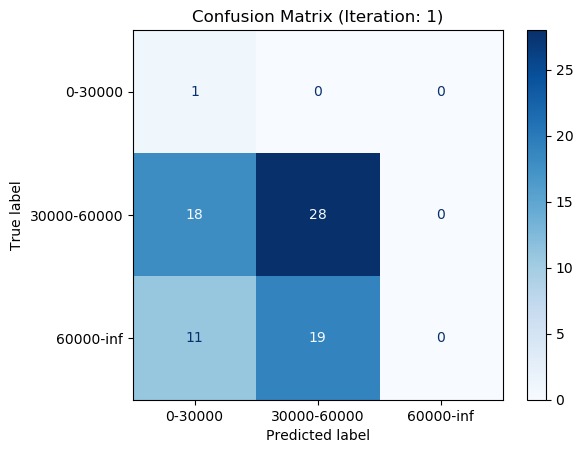


Running iteration 2 based on temporal split
Training on 50 samples, testing on 77 samples.
Number of samples after SMOTE: 108


/home/farscopestudent/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


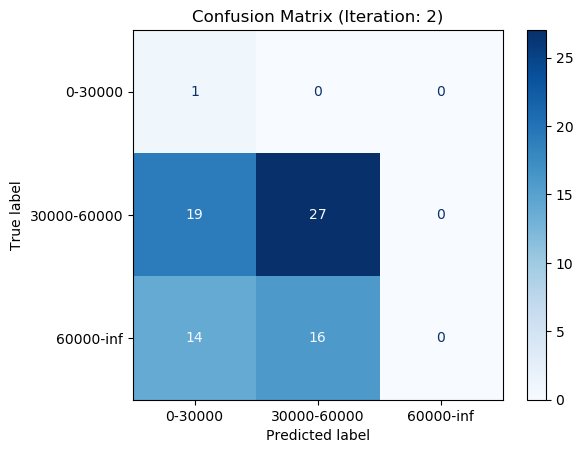


Running iteration 3 based on temporal split
Training on 50 samples, testing on 77 samples.
Number of samples after SMOTE: 108


/home/farscopestudent/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


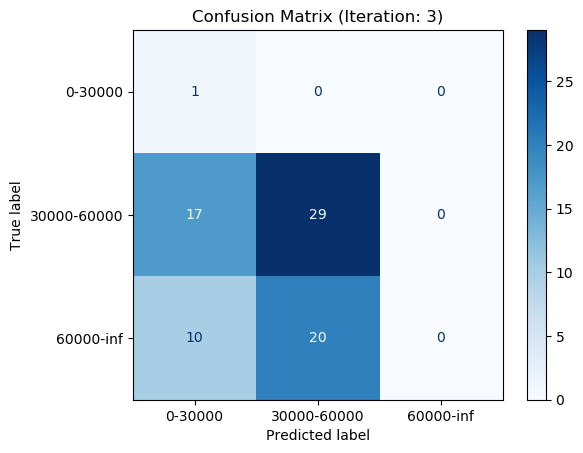


Running iteration 4 based on temporal split
Training on 50 samples, testing on 77 samples.
Number of samples after SMOTE: 108


/home/farscopestudent/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


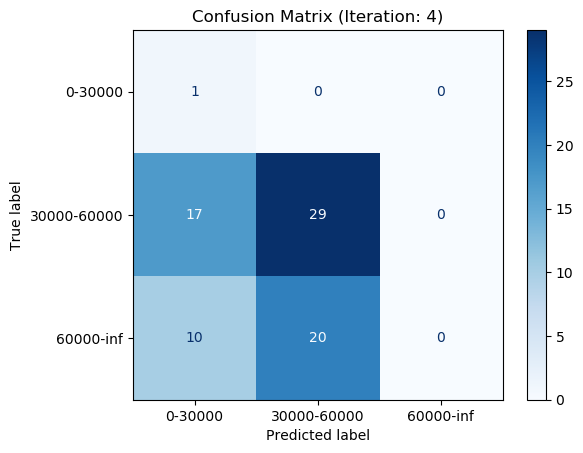


Running iteration 5 based on temporal split
Training on 50 samples, testing on 77 samples.
Number of samples after SMOTE: 108


/home/farscopestudent/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


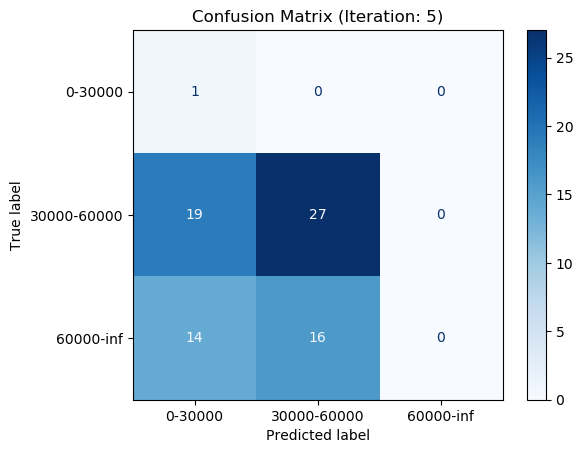


Aggregated Performance Summary:

   Iteration  Accuracy  Precision (Macro)  Recall (Macro)  F1-score (Macro)  \
0          1  0.376623           0.209693        0.536232          0.222222   
1          2  0.363636           0.219106        0.528986          0.221295   
2          3  0.389610           0.209184        0.543478          0.226497   
3          4  0.389610           0.209184        0.543478          0.226497   
4          5  0.363636           0.219106        0.528986          0.221295   

     Class distribution  
0  {1: 46, 2: 30, 0: 1}  
1  {1: 46, 2: 30, 0: 1}  
2  {1: 46, 2: 30, 0: 1}  
3  {1: 46, 2: 30, 0: 1}  
4  {1: 46, 2: 30, 0: 1}  


In [41]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from collections import Counter

# Assume df_interpolated is already defined or loaded
df = df_interpolated.copy()

# Target variable and binning setup
target = 'eq_cod'
bins = [0, 30000, 60000, np.inf]  # Adjusted bin ranges
labels = [f"{bin_start}-{bin_end}" for bin_start, bin_end in zip(bins[:-1], bins[1:])]

# Preprocessing
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.dropna(subset=[target], inplace=True)

# Creating target categories
df['target_category'] = pd.cut(df[target], bins=bins, labels=labels, include_lowest=True)
df.dropna(subset=['target_category'], inplace=True)
df['target_category'] = df['target_category'].cat.codes

# Ensuring feature consistency
expected_features = [feat for feat in df.columns if feat != target and feat != 'target_category']
missing_features = set(expected_features) - set(df.columns)
if missing_features:
    raise ValueError(f"Missing expected features: {missing_features}")

X = df[expected_features]
y = df['target_category']

results_list = []

# Running multiple iterations with different training/validation splits based on time
for state in range(5):  # Change for the number of iterations you want
    print(f"\nRunning iteration {state + 1} based on temporal split")

    # Split data temporally
    train_size = int(0.4 * len(df))  # 40% training, 60% validation
    df_train = df.iloc[:train_size]
    df_val = df.iloc[train_size:]

    X_train = df_train[expected_features]
    y_train = df_train['target_category']
    X_val = df_val[expected_features]
    y_val = df_val['target_category']

    print(f"Training on {len(X_train)} samples, testing on {len(X_val)} samples.")

    # Create and fit a new scaler for each iteration (to avoid using a pre-trained scaler)
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
    X_val_scaled = scaler.transform(X_val)  # Transform validation data

    # Apply SMOTE with k_neighbors set to 3 to avoid issues with small minority class sizes
    smote = SMOTE(random_state=state, k_neighbors=1)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)
    print(f"Number of samples after SMOTE: {len(X_train_smote)}")  # Display the number of samples after SMOTE

    # Train a fresh Random Forest model
    rf_model = RandomForestClassifier(random_state=state)
    rf_model.fit(X_train_smote, y_train_smote)

    # Predictions and evaluation
    y_pred = rf_model.predict(X_val_scaled)

    accuracy = accuracy_score(y_val, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_pred, average='macro')

    cm = confusion_matrix(y_val, y_pred)
    unique_labels = np.unique(np.concatenate((y_val, y_pred)))
    display_labels = [labels[i] for i in unique_labels]

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (Iteration: {state + 1})')
    plt.show()

    # Collect results
    results_summary = {
        'Iteration': state + 1,
        'Accuracy': accuracy,
        'Precision (Macro)': precision,
        'Recall (Macro)': recall,
        'F1-score (Macro)': f1_score,
        'Class distribution': Counter(y_val),
    }
    results_list.append(results_summary)

# Save and print aggregated results
results_df = pd.DataFrame(results_list)
print("\nAggregated Performance Summary:\n")
print(results_df)

results_df.to_csv(os.path.join('model_params', 'aggregated_results_temporal_split.csv'), index=False)
